- **Name - Aditya Jain**
- **Batch No - DS2310**
- **Assingment - Glass Identification**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load datasets
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
print('No. Of Rows', data.shape[0])
print('No Of Columns', data.shape[1])

No. Of Rows 214
No Of Columns 11


**The dataset consists 214 observation**

In [4]:
#Let's sort columns by their Datatype
data.columns.to_series().groupby(data.dtypes).groups

{int64: [0, 10], float64: [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


**Checking missing values**

In [6]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

<Axes: xlabel='10', ylabel='count'>

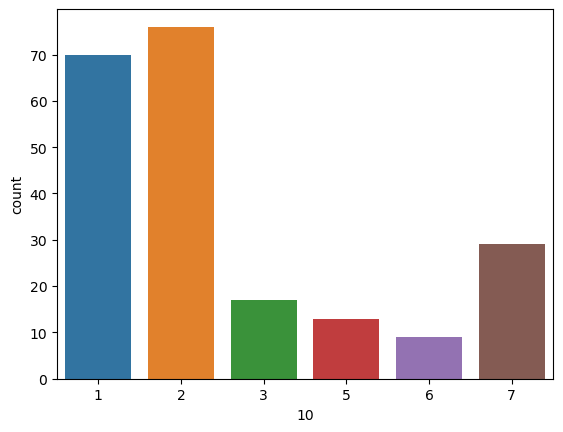

In [7]:
# Number of vales belonging to each class
data[10].value_counts()
sns.countplot(x=10,data=data)

As we can see the dataset is very very unbalanced

The occurence of types 1 and 2 constitute more than 67% of the glass type

# Data Preprocessing

**Attribute Information**

- Id number: 1 to 214
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- **Type of glass: (class attribute)**
- building_windows_float_processed
- building_windows_non_float_processed
- vehicle_windows_float_processed
- vehicle_windows_non_float_processed (none in this database)
- containers
- tableware
- headlamps


**Adding Meaningful column/attribute names**

In [8]:
Names = ['id','RI','Na','Mg','A1','Si','k','Ca','Ba','Fe','glass_type']
data.columns = Names
data.head()

,id,RI,Na,Mg,A1,Si,k,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Removing unnecessary columns**

In [9]:
data = data.drop('id',1)

In [10]:
data.head()

,RI,Na,Mg,A1,Si,k,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Statistic of Dataset**

In [11]:
data.describe()

,RI,Na,Mg,A1,Si,k,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above statistics shows that data is across all attribute is not in same range, so we will have to normalize the data first

The feature are not on the same scale i.e Si has a mean of 72.65 While Fe has a mean value of 0.057. Features should be on the same scale for algoritms such as logistic regression (gradient descent) to coverage smoothly. Let's go ahead and check the distribution of the glass type.

# Data Visualization

In [12]:
# separting class labels and features
feature = ['RI','Na','Mg','A1','Si','k','Ca','Ba','Fe']
label = ['glass_type']
x =data[feature]
y = data[label]

In [13]:
a = x.values

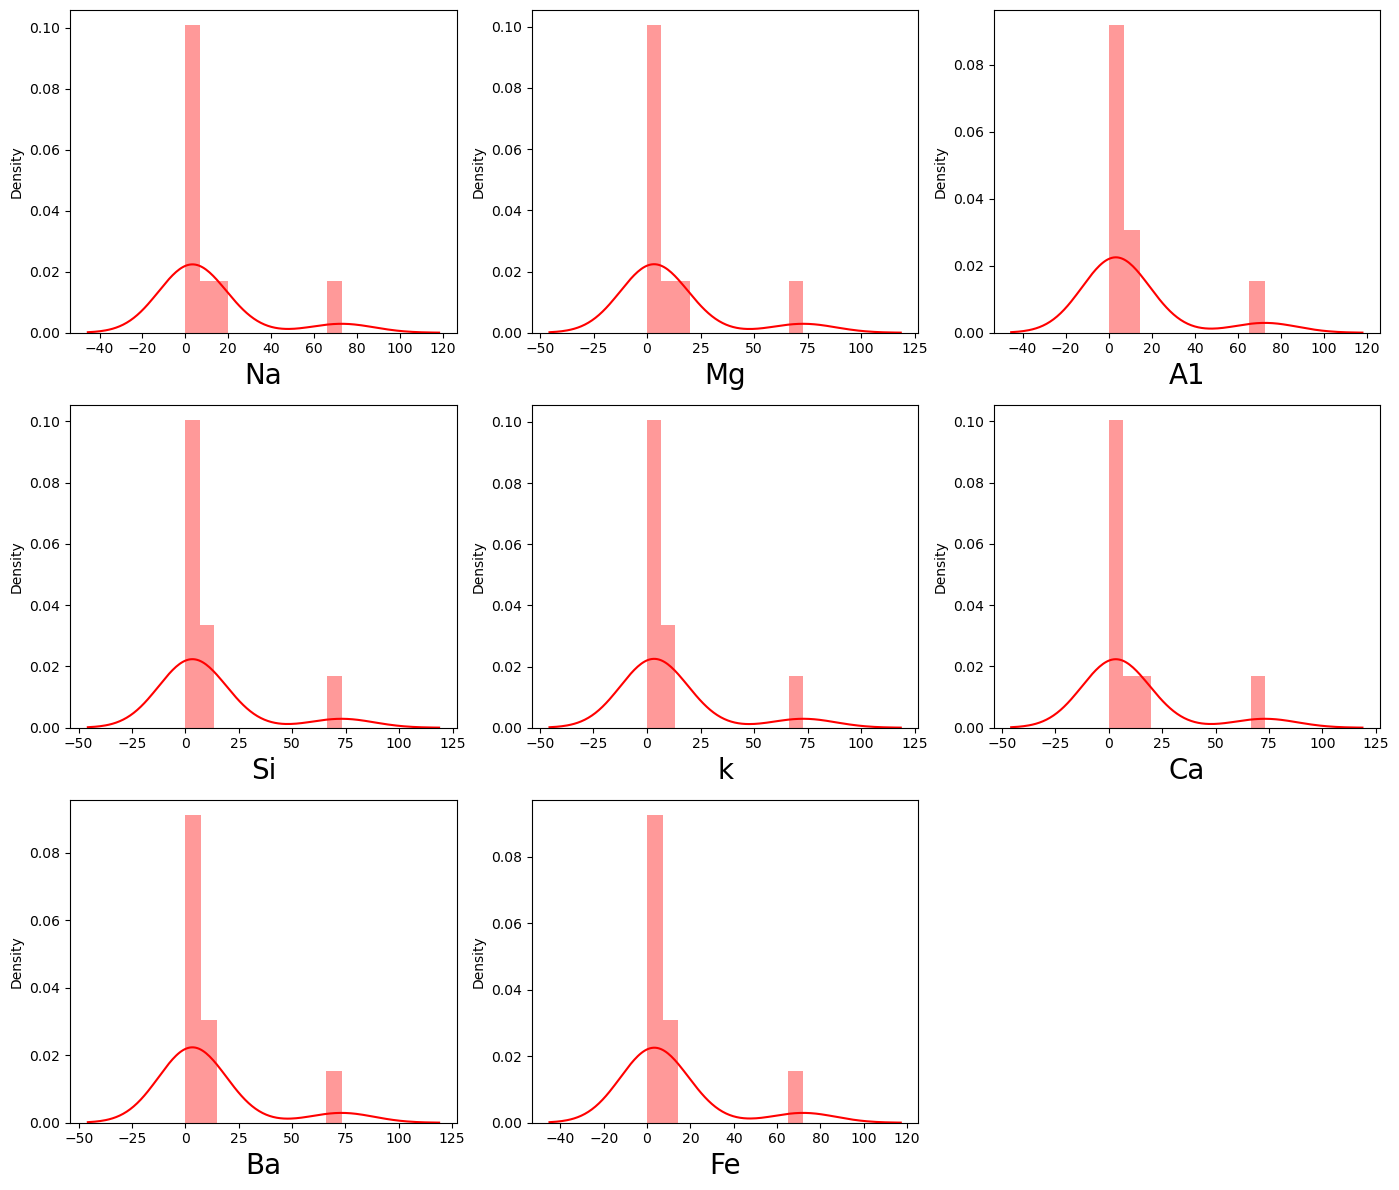

In [14]:
plt.figure(figsize=(14,12), facecolor='white')
plotnumber = 1
for i in range(1,9):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(a[i], color='red')
        plt.xlabel(feature[i],fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Outcomes**

Our dataset is skewed either on positive side or negative side and data is not normalized

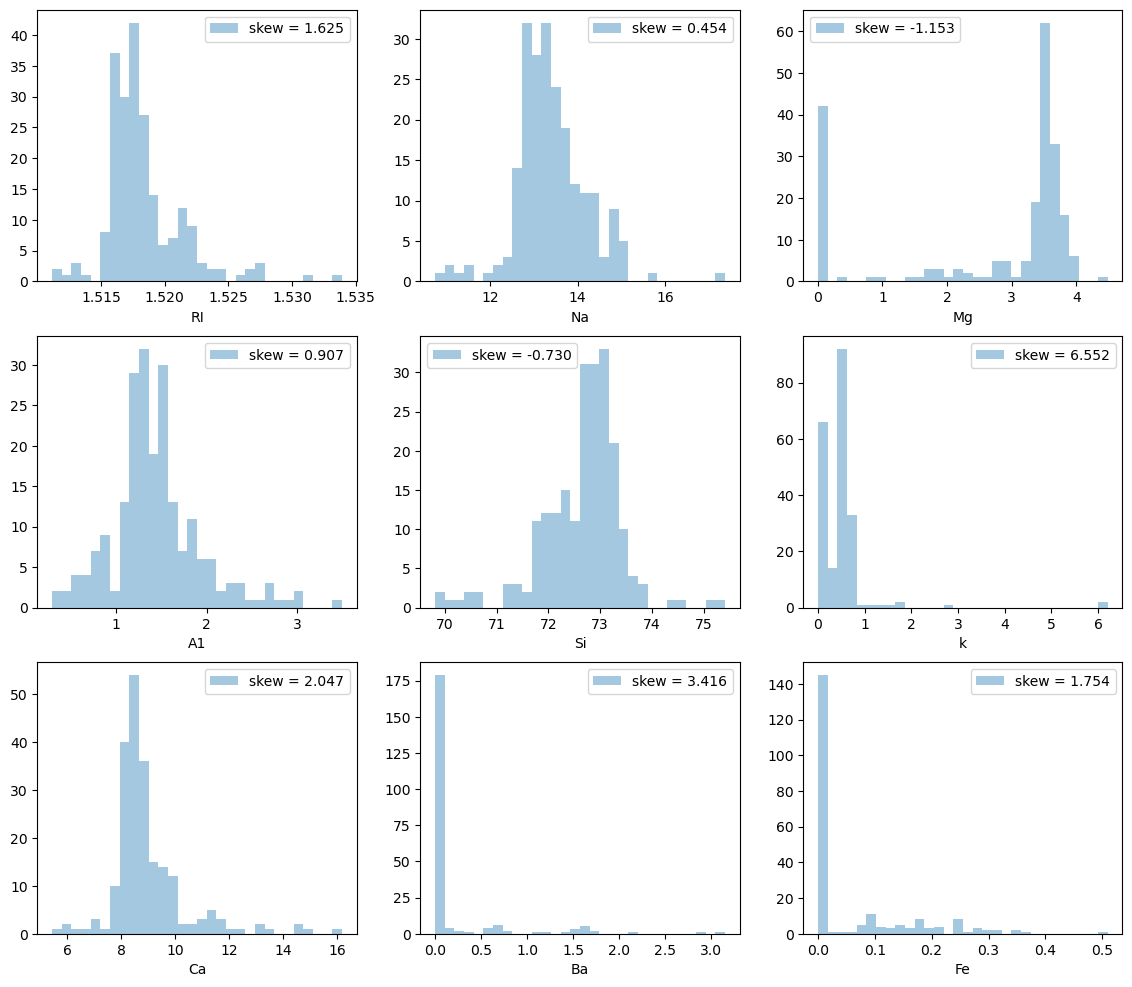

In [15]:
plt.figure(figsize=(14,12), facecolor='white')
plotnumber = 1
for feat in feature:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        skew = data[feat].skew()
        sns.distplot(data[feat],kde = False, label = 'skew = %.3f' %(skew),bins = 30)
    plotnumber+=1
    plt.legend(loc='best')
plt.show()

**Outcomes**

- The distribution of potassium (k) and barium(Ba) seems to contain many outliers.
- The features Fe, Ba, Ca and k are highly skewed (They have high skew coefficients)
- None of the features follow Normal Distribution (are not normal distributed)

# Using Correlation matrix

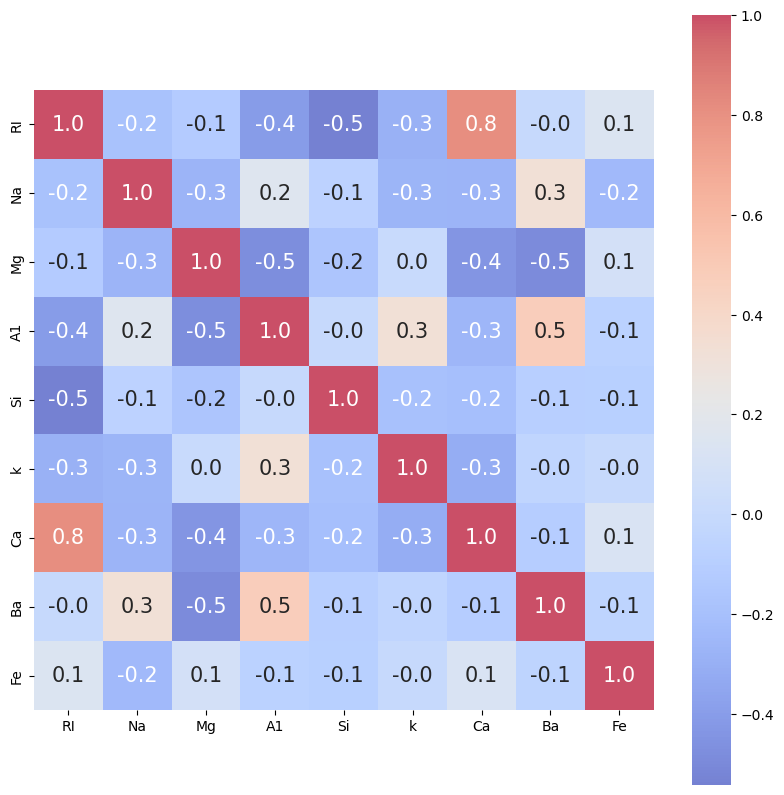

In [16]:
cor = x.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cbar=True, square = True, annot = True, fmt = '.1f',annot_kws={'size':15}, xticklabels=feature, yticklabels=feature, alpha=0.7, cmap='coolwarm')
plt.show()

**Outcomes**

- AI and Ba have intermediate correlation between each other.
- RI and Ca have strong correlation between each other. (This could be a sign to perform Principal component analysis in order to decorrelate some of the input features.)

**identifier the outlier using boxplot**

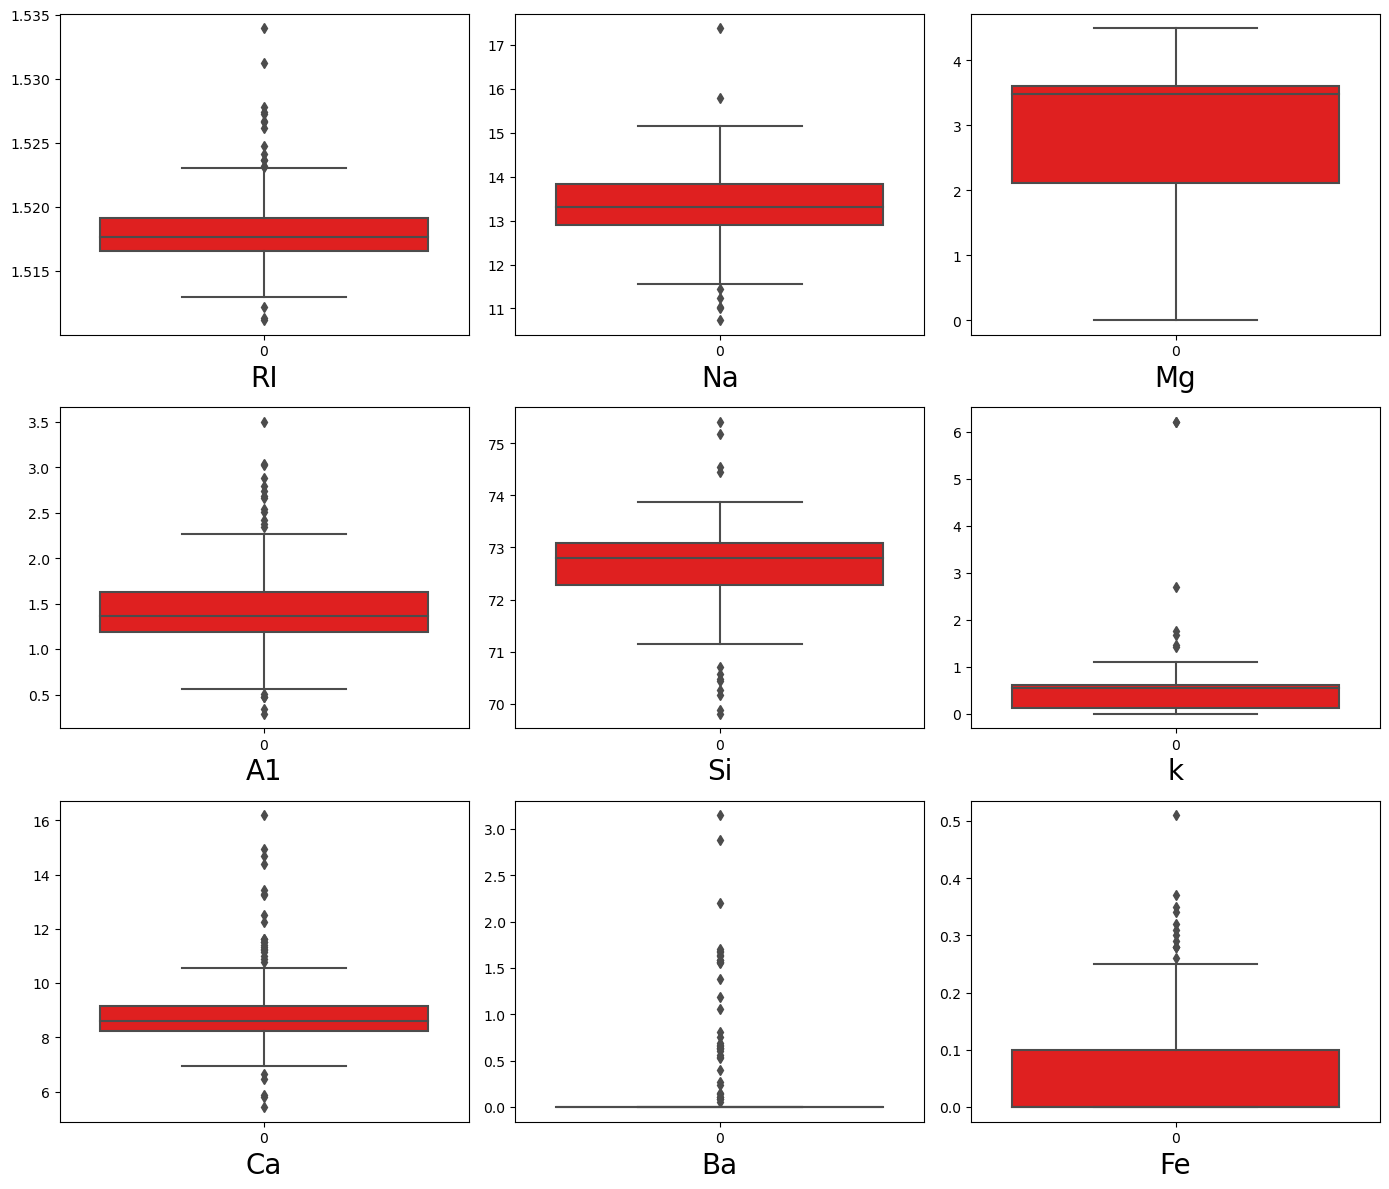

In [17]:
plt.figure(figsize=(14,12), facecolor='white')
plotnumber = 1
for i in feature:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[i], color='red')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Outlier Detection

In [18]:
#outlier detection
def out(data,n, feature):
    outlier=[]
    #iterate over features(column)
    for col in feature:
        #1st quartile(25%)
        Q1= np.percentile(data[col],25)
         #3rd quartile(75%)
        Q3= np.percentile(data[col],75)
        #interquartile range(IQR)
        IQR= Q3 - Q1 
        #outlier step
        out_sleep = 1.5*IQR
        # determine a list of indices of outlier for feature col
        out_list = data[(data[col]< Q1 -  out_sleep) | (data[col] > Q3 + out_sleep )].index
        #append the found outlier indices for col to the list of outlier indices
        outlier.extend( out_list)
        #select observation containing more than 2 outliers
        outlier = Counter(outlier)
        multiple_outlier= list(k for k, v in outlier.items() if v > n)
        return multiple_outlier
        

**removing outlier**

In [19]:
#detection outlier from RI, Na, A1, Si,k, Ca, Ba, Fe
from collections import Counter
Outliers_to_drop = out(data,2,['RI','Na','A1','Si','k','Ca','Ba','Fe'])

In [20]:
#Drop outlier
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [21]:
data.shape

(214, 10)

# Standard Scaler

In [22]:
# splitting data in target and dependent features
x= data.drop(['glass_type'],axis=1)
y = data['glass_type']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale= scaler.fit_transform(x)

# Machine Learning and Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=67)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (160, 9)
Training target vector : (160,)
Test feature matrix size : (54, 9)
Test target vector size : (54,)


**Find best random state**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.25, random_state=67)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)


Best accuracy is 0.6666666666666666 on Random_state 1


# Logisstic regression

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.25,random_state=69)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.6111111111111112
Confusion Matrix Of Logistic Regression :  [[13  4  0  0  0  0]
 [ 6 12  0  2  0  0]
 [ 2  3  0  0  0  0]
 [ 0  1  0  3  0  1]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  0  5]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           1       0.62      0.76      0.68        17
           2       0.57      0.60      0.59        20
           3       0.00      0.00      0.00         5
           5       0.50      0.60      0.55         5
           6       0.00      0.00      0.00         1
           7       0.83      0.83      0.83         6

    accuracy                           0.61        54
   macro avg       0.42      0.47      0.44        54
weighted avg       0.55      0.61      0.58        54



In [28]:
cv_score = cross_val_score(lrr, x_scale,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.51162791 0.6744186  0.55813953 0.60465116 0.69047619]
Mean CVS Score :  0.6078626799557032
Std Deviation :  0.06782111730316545


# K-Nearest Neighbors

In [29]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("KNeighbors Classifier Evaluation")
print('\n')
print("Accuracy Score Of KNeighbors Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of KNeighbors Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of KNeighbors Classifier : ", classification_report(y_test,y_pred))

KNeighbors Classifier Evaluation


Accuracy Score Of KNeighbors Classifier :  0.6481481481481481
Confusion Matrix Of KNeighbors Classifier :  [[15  2  0  0  0  0]
 [ 6 12  0  2  0  0]
 [ 3  2  0  0  0  0]
 [ 1  1  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  5]]
Classification Report Of KNeighbors Classifier :                precision    recall  f1-score   support

           1       0.58      0.88      0.70        17
           2       0.71      0.60      0.65        20
           3       0.00      0.00      0.00         5
           5       0.50      0.40      0.44         5
           6       1.00      1.00      1.00         1
           7       0.83      0.83      0.83         6

    accuracy                           0.65        54
   macro avg       0.60      0.62      0.60        54
weighted avg       0.60      0.65      0.61        54



In [30]:
cv_score = cross_val_score(knn, x_scale,y,cv=5)
print("Cross Validation Score",knn)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score KNeighborsClassifier()
CVS Score :  [0.62790698 0.74418605 0.55813953 0.62790698 0.69047619]
Mean CVS Score :  0.6497231450719824
Std Deviation :  0.06312447784218503


# Decision Tree Classifier

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Decision Tree Classifier Evaluation")
print('\n')
print("Accuracy Score Of Decision Tree Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Decision Tree Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Decision Tree Classifier : ", classification_report(y_test,y_pred))

Decision Tree Classifier Evaluation


Accuracy Score Of Decision Tree Classifier :  0.7037037037037037
Confusion Matrix Of Decision Tree Classifier :  [[14  2  1  0  0  0]
 [ 3 12  4  1  0  0]
 [ 1  2  2  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  5]]
Classification Report Of Decision Tree Classifier :                precision    recall  f1-score   support

           1       0.78      0.82      0.80        17
           2       0.71      0.60      0.65        20
           3       0.29      0.40      0.33         5
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         1
           7       0.83      0.83      0.83         6

    accuracy                           0.70        54
   macro avg       0.73      0.74      0.74        54
weighted avg       0.72      0.70      0.71        54



In [32]:
cv_score = cross_val_score(dt, x_scale,y,cv=5)
print("Cross Validation Score",dt)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score DecisionTreeClassifier()
CVS Score :  [0.60465116 0.58139535 0.58139535 0.51162791 0.5952381 ]
Mean CVS Score :  0.5748615725359911
Std Deviation :  0.032822246390337394


# SVM Classifier

In [33]:
svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
y_pred = svc.predict(x_test)
print("SVC Classifier Evaluation")
print('\n')
print("Accuracy Score Of SVC Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of SVC Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of SVC Classifier : ", classification_report(y_test,y_pred))

SVC Classifier Evaluation


Accuracy Score Of SVC Classifier :  0.6111111111111112
Confusion Matrix Of SVC Classifier :  [[13  4  0  0  0  0]
 [ 8 12  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  3  0  1]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  5]]
Classification Report Of SVC Classifier :                precision    recall  f1-score   support

           1       0.54      0.76      0.63        17
           2       0.57      0.60      0.59        20
           3       0.00      0.00      0.00         5
           5       1.00      0.60      0.75         5
           6       0.00      0.00      0.00         1
           7       0.83      0.83      0.83         6

    accuracy                           0.61        54
   macro avg       0.49      0.47      0.47        54
weighted avg       0.57      0.61      0.58        54



In [34]:
cv_score = cross_val_score(svc, x_scale,y,cv=5)
print("Cross Validation Score",svc)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score SVC()
CVS Score :  [0.58139535 0.69767442 0.53488372 0.74418605 0.69047619]
Mean CVS Score :  0.6497231450719824
Std Deviation :  0.07840938230470616


# Hyper Parameter Tunning: GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameter= [{'fit_intercept': [True, False],
            'penalty': ['l1','l2'],
            'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
            'random_state': [69]
            }]

In [37]:
gc = GridSearchCV(LogisticRegression(),parameter,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [38]:
gc.best_params_

{'fit_intercept': True, 'penalty': 'l1', 'random_state': 69, 'solver': 'saga'}

# Final Model

In [39]:
final = LogisticRegression(fit_intercept= True, penalty = 'l1',random_state = 69, solver = 'saga')
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression Classifier : ", classification_report(y_test,y_pred))

 Final Logistic Regression Evaluation


Accuracy Score Of Logistic Regression Classifier :  0.5925925925925926
Confusion Matrix Of Logistic Regression Classifier :  [[12  5  0  0  0  0]
 [ 6 12  0  2  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  3  0  1]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  0  5]]
Classification Report Of Logistic Regression Classifier :                precision    recall  f1-score   support

           1       0.57      0.71      0.63        17
           2       0.57      0.60      0.59        20
           3       0.00      0.00      0.00         5
           5       0.50      0.60      0.55         5
           6       0.00      0.00      0.00         1
           7       0.83      0.83      0.83         6

    accuracy                           0.59        54
   macro avg       0.41      0.46      0.43        54
weighted avg       0.53      0.59      0.56        54



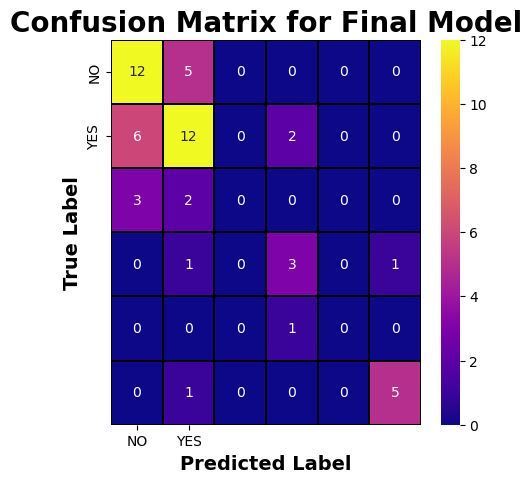

In [40]:
Matrix = confusion_matrix(y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# Predict the final model

In [41]:
# Prediction
prediction = final.predict(x_test)

In [42]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,2,2
1,1,3
2,7,7
3,1,1
4,1,1


# Saving model

In [43]:
import joblib
joblib.dump(final,"glass_identification")

['glass_identification']